# CSC 6220 Homework 1
#### Rob Gillen, T00215814

In [54]:
# setup some things for subsequent computations
%matplotlib inline

import math
import matplotlib
import numpy as np
import scipy.spatial
import scipy.stats
import matplotlib.pyplot as plt

## Problem 1.7 (15pts)

__Outliers are often discarded as noise. However, one person's garbage could be another's treasure. For example, exceptions in credit card transactions can help us detect the fraudulent use of credit cards. Using fraudulence detection as an example, propose two methods that can be used to detect outliers and discuss which one is more reliable.__

## Problem 1.9 (10pts)

__What are the major challenges of mining a huge amount of data (e.g., billions of tuples) in comparison with mining a small amount of data (e.g. data set of a few hundred tuples)?__

## Problem 2.2 (not g) (30pts)

__Suppose that the data for analysis includes the attribute age__


__a.1 What is the mean of the data? What is the median?__

Mean is the average, or central value
$$ \bar{x} = \frac{1}{n}\left(\sum\limits_{i=1}^n x_i\right)$$

In [16]:
ages = [13, 15, 16, 16, 19, 20, 20, 21, 22, 22, 25, 25, 25, 25, 30, 33, 33, 35, 35, 35, 35, 36, 40, 45, 46, 52, 70]
mean = sum(ages)/float(len(ages))
print(mean)

29.962962963


In [51]:
# compare using the built-in function
mean = np.mean(ages)
print(mean)

29.962962963


__a.2 What is the median?__

In [17]:
# Median is the middle number
ages.sort()
median = ages[len(ages)/2]  # works well due to length being odd
print(median)

25


In [52]:
# compare using the built-in function
median = np.median(ages)
print(median)

25.0


__b. What is the mode of the data? Comment on the data's modality (i.e., bimodal, trimodal, etc.)__

In [18]:
# Mode is the most frequent value in the data
distinct_ages = set(ages)
for distinct_age in distinct_ages:
    print "{0} - {1}".format(distinct_age, ages.count(distinct_age))

33 - 2
45 - 1
35 - 4
36 - 1
70 - 1
40 - 1
13 - 1
46 - 1
15 - 1
16 - 2
19 - 1
20 - 2
21 - 1
22 - 2
25 - 4
30 - 1
52 - 1


In [55]:
# compare with the built-in function
# NOTE: The documentation states that it does not handle multi-modal data
# in the case of multiple modes, it returns the lowest
mode = scipy.stats.mode(ages)
print(mode)

ModeResult(mode=array([25]), count=array([4]))


It is seen that the data is _bi-modal_ with values `25` and `35` occuring 4 times each.

__c. What is the midrange of the data?__

In [19]:
# Midrange is the average of the largest and smallest values in the set
midrange = (min(ages) + max(ages))/2
print(midrange)

41


__d. Can you find (roughly) the first quartile ($Q_1$) and the third quartile ($Q_3$) of the data?__

In [59]:
q_1 = ages[len(ages)/4]
print(q_1)

20


In [21]:
q_3 = ages[(len(ages)/4)*3]
print(q_3)

35


In [57]:
# compare using the built-in function
q_1 = np.percentile(ages, 25)
print(q_1)

20.5


__e. Give the five-number summary of the data__

The _five number summary_ of the data is the minimum, $Q_1$, median, $Q_3$, and maximum. For this data set, the five-number summary is:

In [35]:
13, 20, 25, 35, 70

(13, 20, 25, 35, 70)

__f. Show a boxplot of the data__

{'boxes': [<matplotlib.lines.Line2D at 0x7f4a12af4e50>],
 'caps': [<matplotlib.lines.Line2D at 0x7f4a12a8a950>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f4a12a9b650>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f4a12a9b210>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f4a12af4fd0>,
  <matplotlib.lines.Line2D at 0x7f4a12a8a510>]}

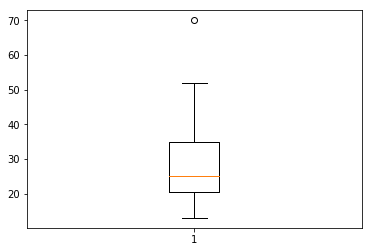

In [36]:
plt.boxplot(ages)

## Problem 2.6 (not d) (15pts)

__Given two objects represented by the tuples (`22`, `1`, `42`, `10`) and (`20`, `0`, `36`, `8`):__

In [26]:
set_a = [22, 1, 42, 10]
set_b = [20, 0, 36, 8]

__a. Compute the Euclidean distance between the two objects__

$$d(i,j) = \sqrt{(x_{1i} - x_{1j})^2 + (x_{2i} - x_{2j})^2 + ... + (x_{pi} - x_{pj})^2}$$

In [39]:
sums = 0
for x in range(len(set_a)):
    sums += (set_a[x] - set_b[x])**2
distance = np.sqrt(sums)
print(distance)

6.7082039325


In [47]:
# compare using the built-in function
distance = scipy.spatial.distance.euclidean(set_a, set_b)
print(distance)

6.7082039325


__b. Compute the Manhattan distance between the two objects__

$$d(i,j) = |x_{1i} - x_{1j}| + |x_{2i} - x_{2j}| + ... + |x_{pi} - x_{pj}|$$

In [34]:
distance = 0
for x in range(len(set_a)):
    distance += math.fabs(set_a[x] - set_b[x])
print(distance)

11.0


In [48]:
# compare using the built-in function
distance = scipy.spatial.distance.cityblock(set_a, set_b)
print(distance)

11


__c. Compute the Minkowski distance between the two objects, using q=3.__

$$d(i,j) = \sqrt[h]{|x_{1i} - x_{1j}|^h + |x_{2i} - x_{2j}|^h + ... + |x_{pi} - x_{pj}|^h}$$

In [38]:
sums = 0
for x in range(len(set_a)):
    sums += math.fabs(set_a[x] - set_b[x])**3
distance = np.cbrt(sums)
print(distance)

6.15344949366


In [50]:
# compare using the built-in function
distance = scipy.spatial.distance.minkowski(set_a, set_b, 3)
print(distance)

6.15344949366


## Problem 3.2 (10pts)

__In real-world data, tuples with missing values for some attributes are a common occurrence. Discribe various methods for handling this problem.__

## Problem 3.7 (20pts)

__Using the data for age given in Exercise 3.3 answer the following:__

__a. Use min-max normalization to transform the value 35 for age onto the range [0.0, 1.0].__

$$v'_i = \frac{v_i - min_A}{max_A-min_A}(newMax_A - newMin_A) + newMin_A$$

In [66]:
v_prime = (((35-min(ages))/float((max(ages)-min(ages))))*(1.0-0.0)) + 0.0

print(v_prime)

0.385964912281


__b. Use z-score normalization to transform the value 35 for age, where the standard deviation of age is 12.94 years.__

$$v'_i=\frac{v_i-\bar{A}}{\sigma_A}$$

where $\bar{A}$ is the mean of the set and $\sigma_A$ is the standard deviation

In [68]:
v_prime = (35-np.mean(ages))/12.94
print(v_prime)

0.389260976587


__c. Use normalization by decimal scaling to transform the value 35 for age.__

$$v'_i=\frac{v_i}{10^j}$$

where $j$ is the smallest integer such that $max(\lvert v'_i\rvert)<1$

In [70]:
v_prime = 35/float(10**2)
print(v_prime)

0.35


__d. Comment on which method you would prefer to use for the given data, giving reasons as to why.__

I think that, given the data sets, I would lean towards either _min-max_ or _z-score_, but would probably settle on _z-score_. _Decimal scaling_ works, but doesn't seem to appropriately scale the values across the available number space (0.0-1.0). Both _min-max_ and _z-score_ spread the values across the data range with better respect to the distribution of the initial values. In this scenario, however, since `70` is a lone outliner, using the standard deviation in the equation pulls the values a bit to the right, reducing its impact.